In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [ ]:
car_data = pd.read_csv('car data.csv')

<Axes: xlabel='Kms_Driven', ylabel='Density'>

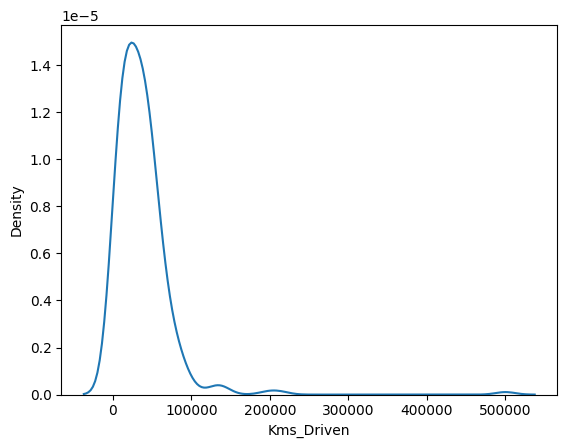

In [3]:
sns.kdeplot(car_data['Kms_Driven'])

1. Function transformer on selling price left skewed.
2. KMS_driven is also left skewed
3. one hot encoding on fuel type, seller type and transmission

In [5]:
X = car_data.drop(['Present_Price'],axis=1)
X['Car_Name'] = X['Car_Name'].str.split(' ').str[0]
y = car_data['Present_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [6]:
X_train

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
282,city,2014,8.25,63000,Diesel,Dealer,Manual,0
163,Bajaj,2010,0.45,27000,Petrol,Individual,Manual,0
42,sx4,2008,1.95,58000,Petrol,Dealer,Manual,0
17,ertiga,2016,7.75,43000,Diesel,Dealer,Manual,0
266,amaze,2014,3.65,35000,Petrol,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
188,Hero,2013,0.25,18000,Petrol,Individual,Manual,0
71,corolla,2011,4.50,45000,Diesel,Dealer,Manual,0
106,Hyosung,2014,1.35,16500,Petrol,Individual,Manual,1
270,city,2011,4.10,69341,Petrol,Dealer,Manual,0


In [7]:
transform = [('function',FunctionTransformer(np.square),[2,3]),('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[0,4,5,6])]
trf = ColumnTransformer(transformers=transform,remainder='passthrough')

In [8]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

C:\Users\upadh\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [9]:
lr = LinearRegression()
lr.fit(X_train_trf,y_train)
lr_pred = lr.predict(X_test_trf)
print('Linear regression accuracy is: ',r2_score(lr_pred,y_test))

Linear regression accuracy is:  0.9441303548600695


In [2]:
ridge = Ridge(alpha=0.1,max_iter=100)
ridge.fit(X_train_trf,y_train)
ridge_predict = ridge.predict(X_test_trf)
print('ridge accuracy is: ',r2_score(y_test,ridge_predict))

ridge accuracy is:  0.9483195328303822


In [3]:
lasso = Lasso(alpha=0.01,max_iter=100)
lasso.fit(X_train_trf,y_train)
lasso_predict = lasso.predict(X_test_trf)
print('lasso accuracy is: ',r2_score(y_test,lasso_predict))

lasso accuracy is:  0.9541029995286051
